In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.preprocessing import MinMaxScaler

In [20]:
#load the data 
amzn_df = pd.read_csv('AMZN_14_22.csv')

In [21]:
amzn_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.940001,19.9680,19.701000,19.898500,19.898500,42756000
1,2014-01-03,19.914499,20.1355,19.811001,19.822001,19.822001,44204000
2,2014-01-06,19.792500,19.8500,19.421000,19.681499,19.681499,63412000
3,2014-01-07,19.752001,19.9235,19.714500,19.901501,19.901501,38320000
4,2014-01-08,19.923500,20.1500,19.802000,20.096001,20.096001,46330000


In [22]:
#Inspect it 
print(amzn_df)

            Date        Open        High         Low       Close   Adj Close  \
0     2014-01-02   19.940001   19.968000   19.701000   19.898500   19.898500   
1     2014-01-03   19.914499   20.135500   19.811001   19.822001   19.822001   
2     2014-01-06   19.792500   19.850000   19.421000   19.681499   19.681499   
3     2014-01-07   19.752001   19.923500   19.714500   19.901501   19.901501   
4     2014-01-08   19.923500   20.150000   19.802000   20.096001   20.096001   
...          ...         ...         ...         ...         ...         ...   
2169  2022-08-15  142.800003  143.759995  141.490005  143.179993  143.179993   
2170  2022-08-16  143.910004  146.570007  142.000000  144.779999  144.779999   
2171  2022-08-17  142.690002  143.380005  140.779999  142.100006  142.100006   
2172  2022-08-18  141.320007  142.770004  140.380005  142.300003  142.300003   
2173  2022-08-19  140.470001  141.110001  137.910004  138.229996  138.229996   

        Volume  
0     42756000  
1    

In [23]:
#print the summary 
print(amzn_df.describe())

              Open         High          Low        Close    Adj Close  \
count  2174.000000  2174.000000  2174.000000  2174.000000  2174.000000   
mean     79.225588    80.108009    78.241598    79.189630    79.189630   
std      52.956121    53.598411    52.238941    52.902640    52.902640   
min      14.220000    14.521000    14.200000    14.347500    14.347500   
25%      31.904250    32.308751    31.369500    31.788000    31.788000   
50%      77.074749    77.954750    75.480247    76.701504    76.701504   
75%     117.067497   119.025374   115.342375   116.446749   116.446749   
max     187.199997   188.654007   184.839493   186.570496   186.570496   

             Volume  
count  2.174000e+03  
mean   8.302917e+07  
std    4.299692e+07  
min    1.762600e+07  
25%    5.561950e+07  
50%    7.138700e+07  
75%    9.668550e+07  
max    4.771220e+08  


In [7]:
# load data set 2
amzn_df2 = pd.read_csv('AMZN_2020_2022.csv')

In [8]:
amzn_df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-17,94.294502,94.332001,92.862503,93.236000,93.236000,79946000
1,2020-01-21,93.250000,94.713501,93.000000,94.599998,94.599998,74156000
2,2020-01-22,94.804497,95.125000,94.167000,94.373001,94.373001,64326000
3,2020-01-23,94.255501,94.499001,93.638000,94.228996,94.228996,49692000
4,2020-01-24,94.568497,94.749496,92.372002,93.082001,93.082001,75324000


In [9]:
#Inspect the 2020-2022
print(amzn_df2)

           Date        Open        High         Low       Close   Adj Close  \
0    2020-01-17   94.294502   94.332001   92.862503   93.236000   93.236000   
1    2020-01-21   93.250000   94.713501   93.000000   94.599998   94.599998   
2    2020-01-22   94.804497   95.125000   94.167000   94.373001   94.373001   
3    2020-01-23   94.255501   94.499001   93.638000   94.228996   94.228996   
4    2020-01-24   94.568497   94.749496   92.372002   93.082001   93.082001   
..          ...         ...         ...         ...         ...         ...   
645  2022-08-10  142.899994  144.600006  141.009995  142.690002  142.690002   
646  2022-08-11  143.860001  144.490005  139.759995  140.639999  140.639999   
647  2022-08-12  142.050003  143.570007  140.119995  143.550003  143.550003   
648  2022-08-15  142.800003  143.759995  141.490005  143.179993  143.179993   
649  2022-08-16  143.910004  146.570007  142.000000  144.779999  144.779999   

       Volume  
0    79946000  
1    74156000  
2  

In [10]:
#print the summary 
print(amzn_df2.describe())

             Open        High         Low       Close   Adj Close  \
count  650.000000  650.000000  650.000000  650.000000  650.000000   
mean   148.333415  150.234915  146.300269  148.263115  148.263115   
std     24.977077   24.857995   24.878893   24.805564   24.805564   
min     82.075500   87.972504   81.301498   83.830498   83.830498   
25%    130.089126  131.135879  126.390375  128.986252  128.986252   
50%    157.837006  159.479996  155.691498  157.618248  157.618248   
75%    165.937496  167.603248  164.344620  165.634747  165.634747   
max    187.199997  188.654007  184.839493  186.570496  186.570496   

             Volume  
count  6.500000e+02  
mean   8.249905e+07  
std    3.595608e+07  
min    2.903800e+07  
25%    5.858200e+07  
50%    7.250700e+07  
75%    9.794900e+07  
max    3.113460e+08  


In [24]:
#now prep the data for 2014-2019
amzn_df.set_index(pd.DatetimeIndex(amzn_df['Date']), inplace=True)

In [12]:
#now prep the data for 2020-2022
amzn_df2.set_index(pd.DatetimeIndex(amzn_df2['Date']), inplace=True)

In [25]:
#Keep the close for 2014-19
amzn_df = amzn_df[['Close']]

In [14]:
print(amzn_df)

                Close
Date                 
2014-01-17  19.980499
2014-01-21  20.352501
2014-01-22  20.226999
2014-01-23  19.993500
2014-01-24  19.379999
...               ...
2019-01-10  82.810997
2019-01-11  82.028000
2019-01-14  80.860497
2019-01-15  83.727997
2019-01-16  84.189003

[1258 rows x 1 columns]


In [15]:
print (amzn_df.index.max())

2019-01-16 00:00:00


In [19]:
print (amzn_df2.index.min())

2020-01-17 00:00:00


In [16]:
#Keep the close 2020-22
amzn_df2 = amzn_df2[['Close']]

In [17]:
print(amzn_df2)

                 Close
Date                  
2020-01-17   93.236000
2020-01-21   94.599998
2020-01-22   94.373001
2020-01-23   94.228996
2020-01-24   93.082001
...                ...
2022-08-10  142.690002
2022-08-11  140.639999
2022-08-12  143.550003
2022-08-15  143.179993
2022-08-16  144.779999

[650 rows x 1 columns]


In [18]:
# final_data = amzn_df2.plot('Date','Close', color='red')
# new_data = final_data.head(60)
# new_data.plot('Date','Close', color='green')
# plt.show()

# amzn_df2.plot('Close', 'Date', color='red')
# plt.show()

In [52]:
#okay what data set am i going to be using. that is what im am confused about. 
#lets try the 2014 data for shits and giggles 

data_14_19 = amzn_df.filter(['Close'])
dataset_14_19 = data_14_19.values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset_14_19)

training_data_len =math.ceil(len(dataset_14_19) *.7)
train_data =scaled_data[0:training_data_len , : ]


X_train_data = []
y_train_data = []

for i in range(120,len(train_data)):
    X_train_data=list(X_train_data)
    y_train_data=list(y_train_data)
    X_train_data.append(train_data[i-120:i,0])
    y_train_data.append(train_data[i,0])
    
    X_train_data1, y_train_data1 = np.array(X_train_data), np.array(y_train_data)
    
    X_train_data2 = np.reshape(X_train_data1,(X_train_data1.shape[0],X_train_data1.shape[1],1))

   
    
#60 = number of days 
# There will be a total of 60 values, 1st column will contain an index of 0-59
# The second will have an index of 1-60 ++_
# the y_train has the 60 st value on c1 and c2 will have 61++

In [36]:
#Lets build the LSTM MODEL 

model = Sequential()

model.add(LSTM(units=50, return_sequences=True,input_shape=(X_train_data2.shape[1],1)))

model.add(LSTM(units=50, return_sequences=False))

model.add(Dense(units=25))

model.add(Dense(units=1))


#okay this example will have 2 LSTM layers w/50 neurons and 2 dense layers
# plust one with 25 nuerons 

In [37]:
# Comple the model 

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_data2, y_train_data1, batch_size=1, epochs=1)

1402/1402 [==============================] - 60s 40ms/step - loss: 6.1153e-04


In [40]:
test_data = scaled_data[training_data_len -120: , : ]

X_test = []

y_test = dataset_14_19[training_data_len : , : ]

for i in range(120,len(test_data)):
    
    X_test.append(test_data[i-120:i,0])

X_test = np.array(X_test)

X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

predictions = model.predict(X_test)

predictions = scaler.inverse_transform(predictions)


21/21 [==============================] - 1s 25ms/step


In [41]:
# Error calculation where RMSE = root mean squared error 

rmse=np.sqrt(np.mean(((predictions-y_test)**2)))

In [42]:
print(rmse)

13.393167576558882


In [32]:
#OOOF okay the lower the value is to 0 the better
# it indicates that the models p-value match the actual values from the data set 
# which in this case it does not. 

/Users/dashickscott/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


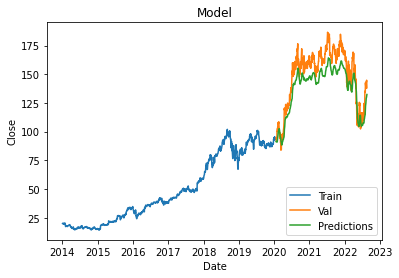

In [43]:
#Predict and visualize 

train = amzn_df[:training_data_len]

valid = amzn_df[training_data_len:]

valid['Predictions'] = predictions

plt.title('Model')

plt.xlabel('Date')

plt.ylabel('Close')

plt.plot(train['Close'])

plt.plot(valid[['Close', 'Predictions']])

plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

plt.show()


<AxesSubplot:xlabel='Date'>

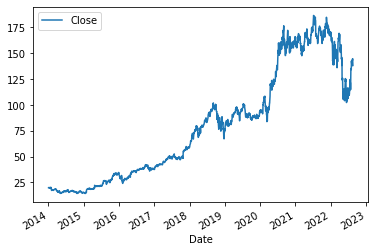

In [34]:
amzn_df.plot()

In [53]:
train['Close']

Date
2014-01-02    19.898500
2014-01-03    19.822001
2014-01-06    19.681499
2014-01-07    19.901501
2014-01-08    20.096001
                ...    
2020-01-13    94.565002
2020-01-14    93.472000
2020-01-15    93.100998
2020-01-16    93.897003
2020-01-17    93.236000
Name: Close, Length: 1522, dtype: float64

In [54]:
valid[['Close', 'Predictions']]

,Close,Predictions
Date,,
2020-01-21,94.599998,91.400360
2020-01-22,94.373001,91.393188
2020-01-23,94.228996,91.417938
2020-01-24,93.082001,91.450394
2020-01-27,91.417000,91.405548
...,...,...
2022-08-15,143.179993,129.950592
2022-08-16,144.779999,130.714691
2022-08-17,142.100006,131.473175


In [59]:
complete_df = pd.concat([train[['Close']], valid[['Close', 'Predictions']]])
complete_df

,Close,Predictions
Date,,
2014-01-02,19.898500,NaN
2014-01-03,19.822001,NaN
2014-01-06,19.681499,NaN
2014-01-07,19.901501,NaN
2014-01-08,20.096001,NaN
...,...,...
2022-08-15,143.179993,129.950592
2022-08-16,144.779999,130.714691
2022-08-17,142.100006,131.473175


In [ ]:
#Predict 2020-2022 based off of amazon_df

In [ ]:
#Plot predicted amazon_df 2020-2022 against actual amazon_df2 

In [ ]:
#Create a Variable to predict 2020-2022
prediction_days = 599

# Create an new column that targets the data and 
# predict values of x day away from the current price 
amzn_df['Actual Prediction'] = amzn_df[['Close']].shift(-prediction_days)


In [ ]:
#print the new column for 2014-19
amzn_df

In [ ]:
# Create independent dataset X and create a numpy array
X=X = np.array(amzn_df[['Close']])

In [ ]:
#Git rid of any Nan/rows 
X=X[:-prediction_days]
#print(X)

In [ ]:
#Creat the dependetnt data for Y
Y=amzn_df['Actual Prediction'].values


In [ ]:
Y=Y[:-prediction_days]
# print(Y)

In [ ]:
# train and test ratio is 70% traing and 30% testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

In [ ]:
#Creat the model
l_r = LinearRegression()
#train the model
l_r.fit(x_train, y_train)

In [ ]:
#test the model using score
linear_score=l_r.score(x_test,y_test)
print(linear_score)

In [ ]:
#well I think that im going to predict the last 500days.
acutal_days=np.array(amzn_df[['Close']])[-prediction_days:]
# acutal_days

In [ ]:
#print the liner regression prediction  for the next 52 days

linear_prediction=l_r.predict(acutal_days)

# linear_prediction


In [ ]:
#okay this is were we put the 2020-2022 data in 
actual_20_22=np.array(amzn_df2[['Close']])
actual_20_22

In [ ]:
linear_prediction.shape

In [ ]:
actual_20_22.shape 

In [ ]:
# Visualize the data

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.plot(linear_prediction) # lable='Prediction' , lw=2, alpha=.7)
plt.plot(actual_20_22) #  , lable='Actual') # , lw=2, alpha=.7)
plt.title('Pred vs Act')
plt.xlabel('Time')
plt.ylabel('Amzn Close USD($)')
plt.legend(['linear_prediction', 'actual_20_22'])
plt.xticks(rotation=45)
plt.show()